# Keşif

In [1]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import os

## Veriyi Al

In [5]:
from olist.data import Olist
data = Olist().get_data()
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

Olist e-ticaret platformundaki her işlem şu özelliklere sahiptir:
- satın alacak olan bir `customer_id`...
- çeşitli `product_id`...
- bir `seller_id`...
- ve bir `review_id`...
- tüm bunlar bir `order_id`'ye aittir.

## Çeşitli DataFrame'lerinizin kardinalitelerini araştırın

❓ **Kaç tane benzersiz `orders`, `reviews`, `sellers`, `products` and `customers` var ?**

In [ ]:
# Examine the data
orders = data["orders"]
reviews = data["order_reviews"]
sellers = data["sellers"]
products = data["products"]
customers = data["customers"]

In [11]:
print("Unique orders:", orders["order_id"].nunique())
print("Unique reviews:", reviews["review_id"].nunique())
print("Unique sellers:", sellers["seller_id"].nunique())
print("Unique products:", products["product_id"].nunique())
print("Unique customers:", customers["customer_id"].nunique())

Unique orders: 99441
Unique reviews: 98410
Unique sellers: 3095
Unique products: 32951
Unique customers: 99441


❓ **Sipariş başına kaç tane yorum(reviews) var? Tüm siparişler için yorum var mı?**
<details>
    <summary markdown=‘span’>İpuçları</summary>

Bu bilgiye bireysel csv dosyanızdan doğrudan erişemezsiniz. Öğrenmek için tabloları birleştirmeniz gerekir. Hangi tür birleştirme yapmanız gerektiğini düşünün.

Hangi tablolara ihtiyacınız olduğundan emin değil misiniz? Öğrenmek için ERD'nize geri dönün.

Yorum sayısını öğrenmek için: `order_id` başına yorum sayısını sayın ve bir histogram çizin. Pandas serisinde `.hist()` kullanabilirsiniz.
</details>

<Axes: >

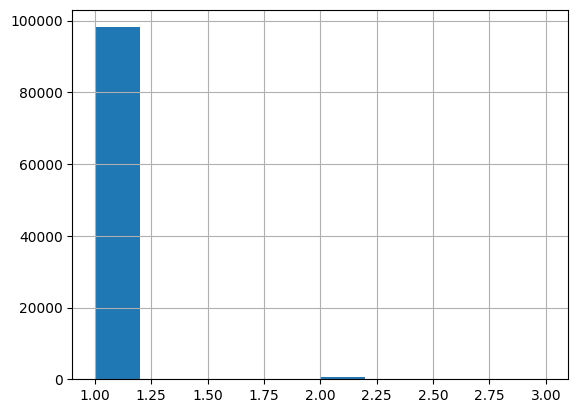

In [26]:
# Calculate how many reviews per order
reviews_per_order = (reviews
                     .groupby("order_id")
                     .size()
                     )
reviews_per_order.hist()

In [27]:
# Merge the order and review DataFrames
merged = orders.merge(
    reviews,
    on="order_id",
    how="left"
)

🧪 **Test your code below**

Yorum eksik olan siparişlerin sayısını `int` olarak `n_missing_reviews` adlı bir değişkende saklayın.

In [28]:
# Calculate number of missing reviews
n_missing_reviews = merged["review_id"].isna().sum()
print("Number of orders without reviews:", n_missing_reviews)

coverage = reviews["order_id"].nunique() / orders["order_id"].nunique()
print("Review coverage ratio:", round(coverage*100, 3))

Number of orders without reviews: 768
Review coverage ratio: 99.228


In [29]:
from nbresult import ChallengeResult

result = ChallengeResult('exploratory',
    n=n_missing_reviews
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/buseozgur/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /Users/buseozgur/code/buseozgur/data-exploratory-analysis/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_exploratory.py::TestExploratory::test_n_missing_reviews PASSED      [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/exploratory.pickle

git commit -m 'Completed exploratory step'

git push origin master

